In [1]:
%matplotlib inline
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [7]:
def postprocess(adata,view=True):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    print('after select HVG',adata.shape)
    sc.pp.scale(adata)
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    if view:
        sc.tl.tsne(adata)
        sc.tl.umap(adata)
    return adata

In [2]:
def cluster_k_leiden(embadata,n_cluster):
    max_steps=120
    this_step = 0
    this_min = 0
    this_max = 2
    print('reference cluster number',n_cluster)
    while this_step < max_steps:
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.leiden(embadata,resolution=this_resolution,random_state=42)
        this_clusters = embadata.obs['leiden'].nunique()
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:break
        this_step+=1
    if this_step==max_steps:
        print('Cannot find the number of clusters')
        print('Use resolution',this_resolution)
    else:
        print('use resolution',this_resolution)
     # leiden
    sc.tl.leiden(embadata,
                 resolution=this_resolution,
                 random_state=42,
                 key_added=f'cluster_{n_cluster}')

In [3]:
refdf = pd.read_csv('./baron/baron_human_ref_19264_fromsaver.csv',index_col=0)
sampledf = pd.read_csv('./baron/baron_human_samp_19264_fromsaver.csv',index_col=0)
magicdf = pd.read_csv('./baron/baron_human_magic.csv',index_col=0)
saverdf = pd.read_csv('./baron/baron_human_saver.csv',index_col=0)
scimputedf = pd.read_csv('./baron/baron_human_scimpute.csv',index_col=0)

<Figure size 400x300 with 0 Axes>

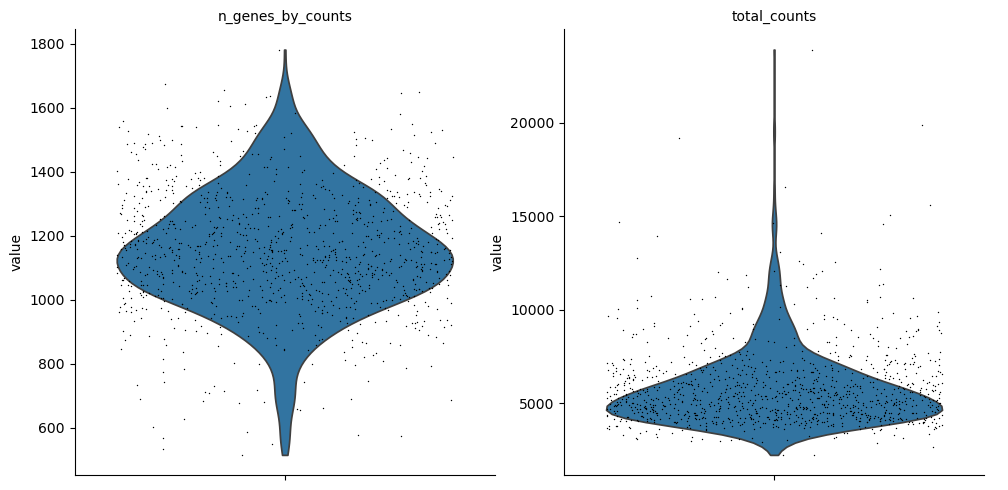

In [4]:
# ref
tmp2adata = sc.AnnData(refdf)
sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True) # 计算质控指标
plt.figure(figsize=(4,3)) # 指定绘图大小
sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<Figure size 400x300 with 0 Axes>

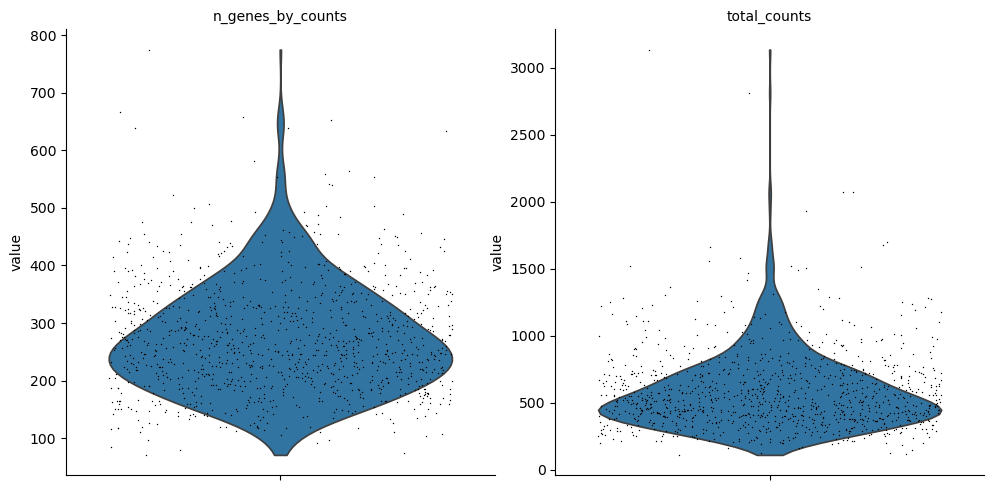

In [5]:
# ref
tmp2adata = sc.AnnData(sampledf)
sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True)
plt.figure(figsize=(4,3))
sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [8]:
refAdata = sc.AnnData(refdf)
refAdata = postprocess(refAdata,True)

sampleAdata = sc.AnnData(sampledf)
sampleAdata = postprocess(sampleAdata,True)

magicAdata = sc.AnnData(magicdf)
magicAdata = postprocess(magicAdata,True)

saverAdata = sc.AnnData(saverdf)
saverAdata = postprocess(saverAdata,True)

scimputeAdata = sc.AnnData(scimputedf)
scimputeAdata = postprocess(scimputeAdata,True)

after select HVG (1076, 432)


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


after select HVG (1076, 496)


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


after select HVG (1076, 489)


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


after select HVG (1076, 612)


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


after select HVG (1076, 518)


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
sc.tl.leiden(refAdata,resolution=0.6)

/tmp/ipykernel_8230/1251783822.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(refAdata,resolution=0.6)


In [10]:
numcls = refAdata.obs.leiden.unique().shape[0]
numcls

7

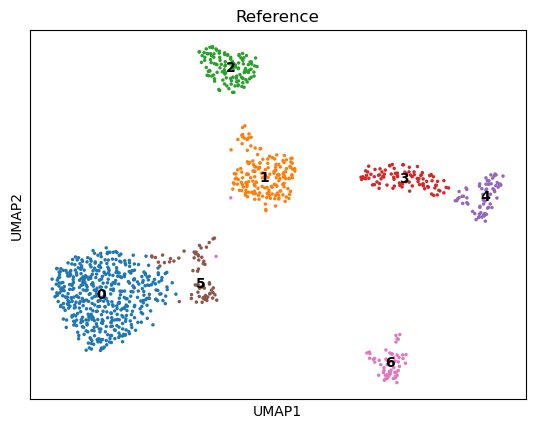

In [11]:
sc.pl.umap(refAdata,color=[f'leiden'],size=25,title='Reference',legend_loc='on data')

In [2]:
!nvidia-smi

Fri Sep 20 14:11:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A800 80GB PCIe          Off | 00000000:69:00.0 Off |                    0 |
| N/A   41C    P0              47W / 300W |      4MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [12]:
import pandas as pd
import scanpy as sc
sampledf = pd.read_csv('./baron/baron_human_samp_19264_fromsaver.csv',index_col=0)
scviAdata = sc.AnnData(sampledf)

sc.pp.highly_variable_genes(
    scviAdata,
    flavor="seurat_v3",
    n_top_genes=2000,
    subset=True,
)

import scvi
scvi.model.SCVI.setup_anndata(scviAdata)

vae = scvi.model.SCVI(scviAdata)

vae.train()

scviemb = vae.get_latent_representation()

scviAdata = sc.AnnData(pd.DataFrame(scviemb,index=refdf.index))
sc.pp.scale(scviAdata)
sc.tl.pca(scviAdata)
sc.pp.neighbors(scviAdata)

sc.tl.umap(scviAdata)
sc.tl.tsne(scviAdata)

/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: Fa

Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 19.51it/s, v_num=1, train_loss_step=618, train_loss_epoc

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 17.90it/s, v_num=1, train_loss_step=618, train_loss_epoc


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
cluster_k_leiden(sampleAdata,numcls)
cluster_k_leiden(magicAdata,numcls)
cluster_k_leiden(saverAdata,numcls)
cluster_k_leiden(scimputeAdata,numcls)
cluster_k_leiden(scviAdata,numcls)

reference cluster number 7
use resolution 0.875
reference cluster number 7
use resolution 0.046875
reference cluster number 7
use resolution 0.75
reference cluster number 7
use resolution 1.0
reference cluster number 7
use resolution 1.0


In [14]:
adatalist = [sampleAdata,magicAdata,saverAdata,scimputeAdata,scviAdata]
for tmpadata in adatalist:
    tmpadata.obs['refleiden']=refAdata.obs['leiden']

## continous

In [15]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score,davies_bouldin_score,calinski_harabasz_score,silhouette_score
import numpy as np
scnmi=[]
scari=[]
scch = []
scdb=[]
scsil=[]
for i in np.arange(1,5.5,0.5):
    if i==0:
        # imputeemb = np.load('baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_embedding_768.npy')
        imputeemb = np.load('baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_embedding.npy')
        
    else:
        # imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres{i:.1f}_embedding_768.npy')
        imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_fold{i:.1f}_embedding.npy')
        
    imputeAdata = sc.AnnData(pd.DataFrame(imputeemb,index=refdf.index))
    sc.pp.scale(imputeAdata)
    sc.tl.pca(imputeAdata)
    sc.pp.neighbors(imputeAdata)
    # sc.tl.tsne(imputeAdata)
    # sc.tl.umap(imputeAdata)
    cluster_k_leiden(imputeAdata,numcls)    
    imputenmi = normalized_mutual_info_score(refAdata.obs[f'leiden'], imputeAdata.obs[f'cluster_{numcls}']) 
    imputeari = adjusted_rand_score(refAdata.obs[f'leiden'], imputeAdata.obs[f'cluster_{numcls}']) 
    scnmi.append(imputenmi)
    scari.append(imputeari)
    scch.append(calinski_harabasz_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))
    scdb.append(davies_bouldin_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))
    scsil.append(silhouette_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))

/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.625
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.625
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.625
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.625
reference cluster number 7


/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5


### NMI

In [16]:
import seaborn as sns
import colorbm as cbm
from matplotlib import rcParams
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.spines.left'] = True
rcParams['axes.spines.bottom'] = True
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

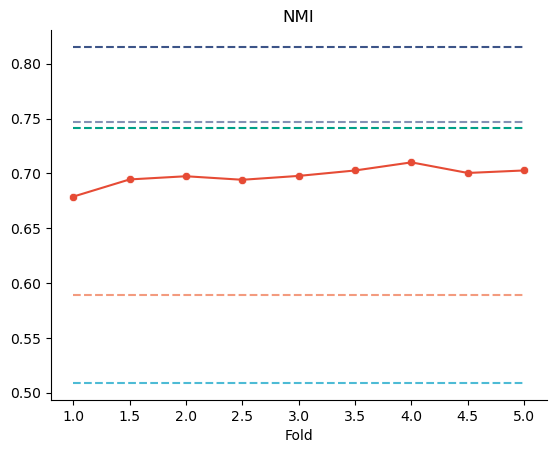

In [17]:
# plt.figure(figsize=(6,2))
import seaborn as sns
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(normalized_mutual_info_score(tmpadata.obs[f'refleiden'], tmpadata.obs[f'cluster_{numcls}']))

axisx = np.arange(1,5.5,0.5)
    
sns.scatterplot(x=axisx,y=scnmi)
sns.lineplot(x=axisx,y=scnmi,label=f'scEPT')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"NMI")
plt.xlabel(f"Fold");
plt.savefig('Baron_NMI_fold.pdf',bbox_inches='tight')
plt.show()

### ARI

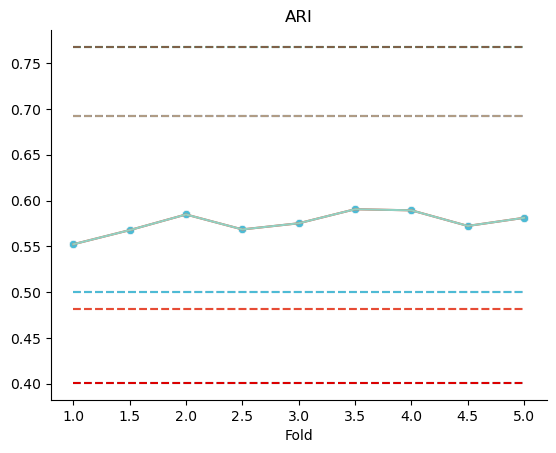

In [19]:
# figsize(3,2)
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(adjusted_rand_score(tmpadata.obs[f'refleiden'], tmpadata.obs[f'cluster_{numcls}']))

sns.scatterplot(x=axisx,y=scari)
sns.lineplot(x=axisx,y=scari,label=f'scEPT Highres')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')

plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"ARI")
# plt.xlabel(f"Added Resolution (Log)");
plt.xlabel(f"Fold");
plt.savefig('Baron_ARI_fold.pdf',bbox_inches='tight')
plt.show()

### silhouette_score

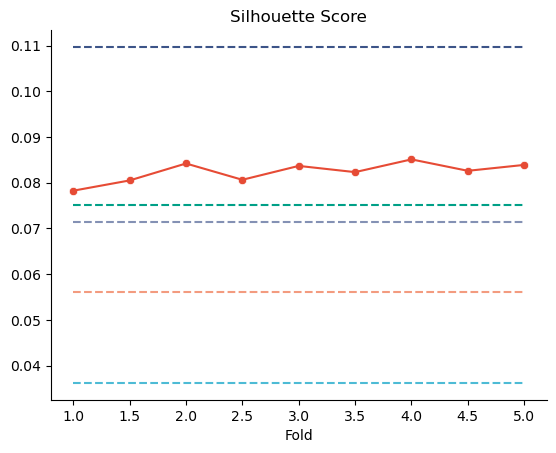

In [20]:
# figsize(3,2)
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(silhouette_score(refAdata.obsm[f'X_pca'], tmpadata.obs[f'cluster_{numcls}']))
# scorelist.append(silhouette_score(adatalist[-1].X, adatalist[-1].obs[f'cluster_{numcls}']))

sns.scatterplot(x=axisx,y=scsil)
sns.lineplot(x=axisx,y=scsil,label=f'scEPT Highres')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')

plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"Silhouette Score")
# plt.xlabel(f"Added Resolution (Log)");
plt.xlabel(f"Fold");
plt.savefig('Baron_sil_fold.pdf',bbox_inches='tight')
plt.show()

In [21]:
imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres5_embedding.npy')
imputeAdata = sc.AnnData(pd.DataFrame(imputeemb,index=refdf.index))
sc.pp.scale(imputeAdata)
sc.tl.pca(imputeAdata)
sc.pp.neighbors(imputeAdata)

sc.tl.tsne(imputeAdata)
sc.tl.umap(imputeAdata)

cluster_k_leiden(imputeAdata,numcls)
imputeAdata.obs['refleiden']=refAdata.obs['leiden']

/data/home/rxzhu/anaconda3/envs/mamba/envs/scfoundation/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


In [22]:
namelist = ['Sample','MAGIC','SAVER','scImpute','scVI','scFoundation']

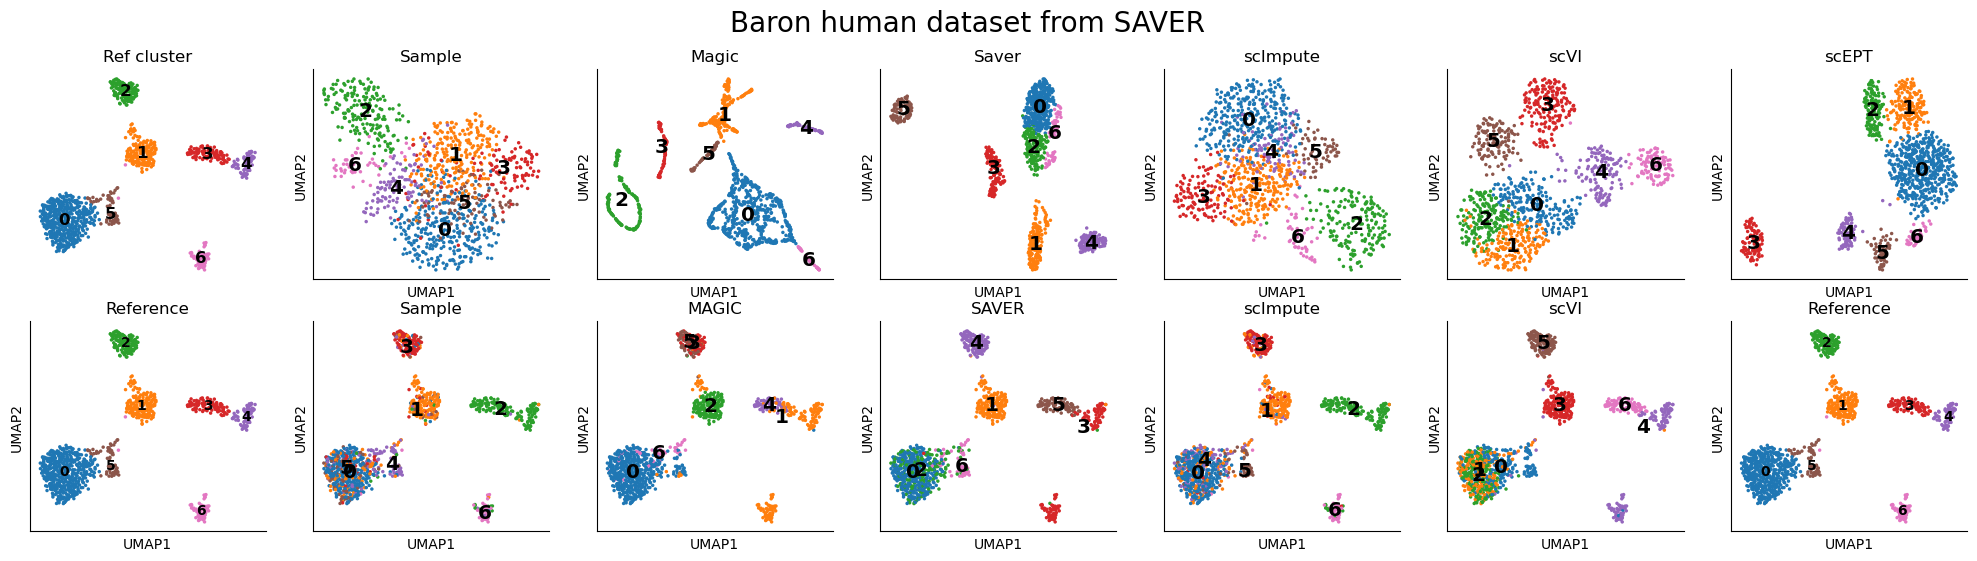

In [50]:
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))
fig, axes = plt.subplots(2,7,figsize=(25,6))
fig.suptitle(f'Baron human dataset from SAVER',fontsize=20)

sc.pl.umap(refAdata,color=[f'leiden'],size=25,ax=axes[0][0],show=False,title='Ref cluster',legend_loc='on data',legend_fontweight='black',legend_fontsize='large',frameon=False)
sc.pl.umap(sampleAdata,color=[f'leiden'],size=25,ax=axes[0][1],show=False,title='Sample',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(magicAdata,color=[f'leiden'],size=25,ax=axes[0][2],show=False,title='Magic',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(saverAdata,color=[f'leiden'],size=25,ax=axes[0][3],show=False,title='Saver',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(scimputeAdata,color=[f'leiden'],size=25,ax=axes[0][4],show=False,title='scImpute',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(scviAdata,color=[f'leiden'],size=25,ax=axes[0][5],show=False,title='scVI',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(imputeAdata,color=[f'leiden'],size=25,ax=axes[0][6],show=False,title='scEPT',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)


sc.pl.umap(refAdata,color=[f'leiden'],size=25,ax=axes[1][0],show=False,title='Reference',legend_loc='on data')
for name,tmpadata in zip(namelist,adatalist):
    refAdata_filtered.obs['tmpcls']=tmpadata.obs[f'cluster_{numcls}']
    sc.pl.umap(refAdata_filtered,color=[f'tmpcls'],size=25,ax=axes[1][namelist.index(name)+1],show=False,title=name,legend_loc='on data',legend_fontweight='black',legend_fontsize='x-large',frameon=True,palette=refAdata.uns['leiden_colors'])
sc.pl.umap(refAdata_filtered,color=[f'leiden'],size=25,ax=axes[1][6],show=False,title='Reference',legend_loc='on data',frameon=True,palette=refAdata.uns['leiden_colors'])
plt.savefig('Baron_human_dataset_from_SVAER.pdf',bbox_inches='tight')
plt.show()

In [25]:
duplicates_obs = refAdata.obs.index[refAdata.obs.index.duplicated()]
print("Duplicate indices in .obs:", duplicates_obs)

Duplicate indices in .obs: Index([], dtype='object')


In [26]:
# 检查 var 中的重复列
duplicates_var = refAdata.var.index[refAdata.var.index.duplicated()]
print("Duplicate indices in .var:", duplicates_var)

Duplicate indices in .var: Index([], dtype='object')


In [27]:
# 检查两者是否有相同的索引
print("refAdata.obs index:", refAdata.obs.index)
print(f"tmpadata.obs index (cluster_{numcls}):", tmpadata.obs.index)

refAdata.obs index: Index(['GATGACGGAC-GGTGGGAT', 'GAGCGTTGCT-ACCTTCTT', 'CTTACGGG-CCATTACT',
       'GATGTACACG-TTAAACTG', 'GAGATTGCGA-GTCGTCGT', 'AATCCCACG-ATTCGACG',
       'AAAATCGTT-CTCCGCAT', 'GACTCTTGAC-AAACTGGT', 'GAGAATTCGT-GTTTGTTT',
       'AGAAGTCC-CCGCTGTT',
       ...
       'ATATGCAT-CTGCGTTG', 'GAACCACGCT-TCACGTTT', 'ACCCGACTT-GCCTCTTT',
       'TGACCTGTTAT-CCCGACTT', 'GATGACCCTC-CCGCAACT', 'ATTGTGACT-CGCTAATA',
       'GATCTCAACC-TTTACCCT', 'CAGTTTGC-GTTCTGTT', 'GAATGGGCAC-GATGTATT',
       'GAGGTCCCTT-CCACATTA'],
      dtype='object', length=1076)
tmpadata.obs index (cluster_7): Index(['GATGACGGAC-GGTGGGAT', 'GAGCGTTGCT-ACCTTCTT', 'CTTACGGG-CCATTACT',
       'GATGTACACG-TTAAACTG', 'GAGATTGCGA-GTCGTCGT', 'AATCCCACG-ATTCGACG',
       'AAAATCGTT-CTCCGCAT', 'GACTCTTGAC-AAACTGGT', 'GAGAATTCGT-GTTTGTTT',
       'AGAAGTCC-CCGCTGTT',
       ...
       'ATATGCAT-CTGCGTTG', 'GAACCACGCT-TCACGTTT', 'ACCCGACTT-GCCTCTTT',
       'TGACCTGTTAT-CCCGACTT', 'GATGACCCTC-CCGCAACT', 'ATTGT

In [51]:
diff_in_ref = refAdata.obs.index.difference(tmpadata.obs.index)
print("Indices in refAdata but not in tmpadata:", diff_in_ref)

Indices in refAdata but not in tmpadata: Index([], dtype='object')


In [52]:
diff_in_tmp = tmpadata.obs.index.difference(refAdata.obs.index)
print("Indices in tmpadata but not in refAdata:", diff_in_tmp)

Indices in tmpadata but not in refAdata: Index([], dtype='object')


In [31]:
# 保留 refAdata 中与 tmpadata 相同的索引
refAdata_filtered = refAdata[tmpadata.obs.index, :]

In [53]:
refAdata.shape

(1076, 432)

In [55]:
tmpadata.shape

(1076, 10)

In [37]:
magicdf.shape

(1076, 19264)

In [43]:
tmpadata.obs.loc['AGGTTAGTG-CGCTCTCA.1']

leiden       3
cluster_7    3
refleiden    1
Name: AGGTTAGTG-CGCTCTCA.1, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']

In [45]:
refAdata.obs.loc['AGGTTAGTG-CGCTCTCA.1']

leiden    1
Name: AGGTTAGTG-CGCTCTCA.1, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']